# Naive Bayes - Sklearn Implementation

### Importing required libraries

In [67]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing dataset and converting the target variable which is currently text in to numeric categories

In [48]:
inp_dataset = pd.read_csv("C:\\Ujjwal\\Analytics\\Datasets\\News Classification\\News_train.csv")
inp_dataset['Category'] = inp_dataset.Category.map({'business':0, 'tech':1, 'politics':2, 'sport':3, 'entertainment':4})
inp_dataset.head(2)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,0
1,154,german business confidence slides german busin...,0


### Dividing data in to test and train dataset

In [49]:
Y = inp_dataset["Category"]
X = inp_dataset.drop(["Category","ArticleId"], axis = 1)

train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state = 8)

### Creating a count verctor for both test and train data

In [50]:
Cnt_Vec = CountVectorizer(stop_words="english")
train_data = Cnt_Vec.fit_transform(train_X['Text']).toarray()
test_data = Cnt_Vec.transform(test_X['Text']).toarray()

### Creating a multinomial classifier with 100 different values of hyperparameter, *alpha*

In [79]:
score = []
alpha = []
for i in np.linspace(0.01,1,25):
    Muti_NB = MultinomialNB(alpha=round(i,2))
    Muti_NB.fit(train_data, train_y)
    pred = Muti_NB.predict(test_data)
    score.append(accuracy_score(test_y,pred))
    alpha.append(round(i,2))

### Checking the variation in prediction accuracy with different value of alpha
- Clear indication that lower values of alpha are always recommended 

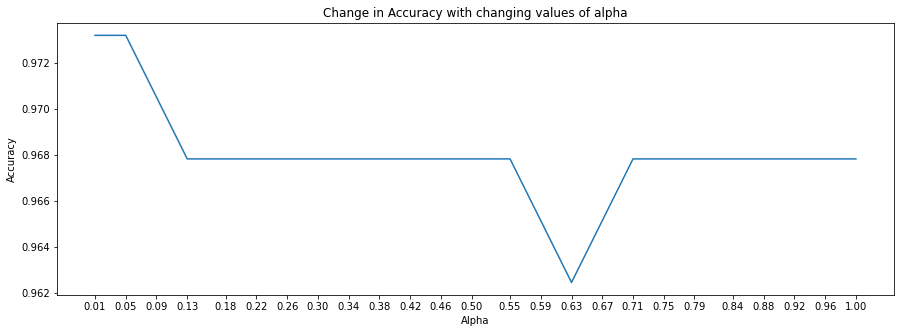

In [80]:
plt.figure(figsize=(15,5))
plt.plot(alpha, score)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Change in Accuracy with changing values of alpha")
plt.xticks(alpha)
plt.show()